<a href="https://colab.research.google.com/github/KAVYANSHTYAGI/Food-Image-Classifier/blob/main/Food_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau , LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,classification_report
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/datasets2.tar'

# Directory to extract the contents
extract_dir = '/content/datasets'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'File unzipped successfully to {extract_dir}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/datasets2.tar'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_dir = "/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian"
class_labels = os.listdir(base_dir)
print(len(class_labels))

30


In [4]:
data = []
count = 0

for label in class_labels:
    path = os.path.join(base_dir, label)
    print(path)
    for img in os.listdir(path):
        try:
            image = load_img(os.path.join(path,img), color_mode="rgb", target_size=(224,224))
            image = img_to_array(image)
            image /= 255.0
            data.append([image, count])

        except Exception as e:
            pass
    count = count + 1


/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/Aloo Puri
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/bal mithai - Google Search
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/Bhindi Masala
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/Chhole Bhature
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/chole kulcha food images - Google Search
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/Dal Makhni
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/egg bhurji - Google Search
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/ghewar - Google Search
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/Gulab Jamun
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/kathi roll - Google Search
/content/drive/MyDrive/Food Image Datasets/North Indian/gaussian/kulfi - Google Search
/content/drive/MyDrive/Food Image Datasets/North Indian/

In [5]:
print(len(data))
print(count)
num_classes = count

9325
30


In [6]:
X,y = zip(*data)
X[0]
print(y)


(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
data = None

In [7]:
import numpy as np
X = np.array(X)
y = np.array(y)


In [8]:

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape ,  x_test.shape , y_train.shape , y_test.shape)

(7460, 224, 224, 3) (1865, 224, 224, 3) (7460,) (1865,)


In [ ]:
X = None
y = None

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, random_state=42)
print(x_train.shape , x_val.shape , y_train.shape , y_val.shape)

(24232, 224, 224, 3) (2693, 224, 224, 3) (24232,) (2693,)


In [ ]:

x_train = None
y_train = None
x_test = None
y_test = None

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)

X shape: (9287, 224, 224, 3)
y shape: (9287,)
x_train shape: (5943, 224, 224, 3)
y_train shape: (5943,)
x_test shape: (1858, 224, 224, 3)
y_test shape: (1858,)
x_val shape: (1486, 224, 224, 3)
y_val shape: (1486,)


In [9]:
from tensorflow.keras.utils import to_categorical



In [ ]:
y = to_categorical(y, num_classes=35)

In [10]:
y_test = to_categorical(y_test, num_classes=num_classes)

In [11]:
y_train = to_categorical(y_train, num_classes=num_classes)

In [ ]:
y_val = to_categorical(y_val,num_classes = num_classes)

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'               # Fill missing pixels after transformations
)


val_test_datagen = ImageDataGenerator()


train_generator = train_datagen.flow(x_train, y_train)
val_generator = val_test_datagen.flow(x_test, y_test)

In [ ]:
train_generator = None
val_generator = None
model = None
history = None
labells = None
true_labels = None
prediction = None

In [16]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import layers, models, regularizers
base_model =  EfficientNetB7(include_top=False,
                            weights='imagenet',
                            input_shape=(224,224, 3))

for layer in base_model.layers:
    layer.trainable = True

model = models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),# Dropout layer with 20% dropout rate
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
base_model = MobileNetV3Large(include_top=False,
                            weights='imagenet',
                            input_shape=(224,224, 3))

base_model.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=6e-5)
loss_fn = SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 537s 1s/step - accuracy: 0.0999 - loss: 3.2667 - val_accuracy: 0.0622 - val_loss: 3.3526 - learning_rate: 1.0000e-04
Epoch 2/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 124s 518ms/step - accuracy: 0.5380 - loss: 1.7297 - val_accuracy: 0.1721 - val_loss: 3.0329 - learning_rate: 1.0000e-04
Epoch 3/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 124s 522ms/step - accuracy: 0.7430 - loss: 0.9509 - val_accuracy: 0.5603 - val_loss: 1.5811 - learning_rate: 1.0000e-04
Epoch 4/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 124s 518ms/step - accuracy: 0.8160 - loss: 0.6483 - val_accuracy: 0.7807 - val_loss: 0.7871 - learning_rate: 1.0000e-04
Epoch 5/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 125s 525ms/step - accuracy: 0.8524 - loss: 0.5405 - val_accuracy: 0.8279 - val_loss: 0.6505 - learning_rate: 1.0000e-04
Epoch 6/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 124s 518ms/step - accuracy: 0.8874 - loss: 0.4024 - val_accuracy: 0.8375 - val_loss: 0.6308 - learning_rate: 1.0000e-04
Epoch 7/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 124

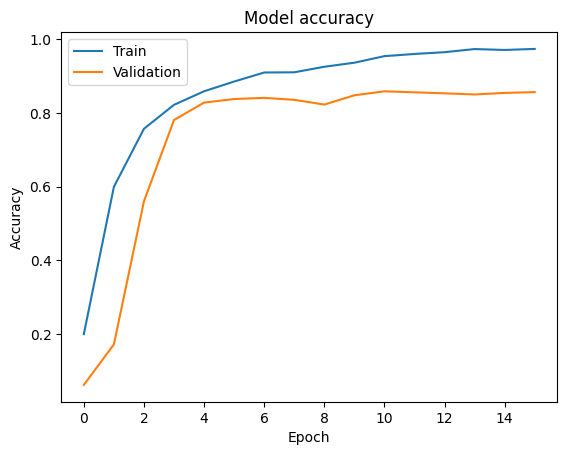

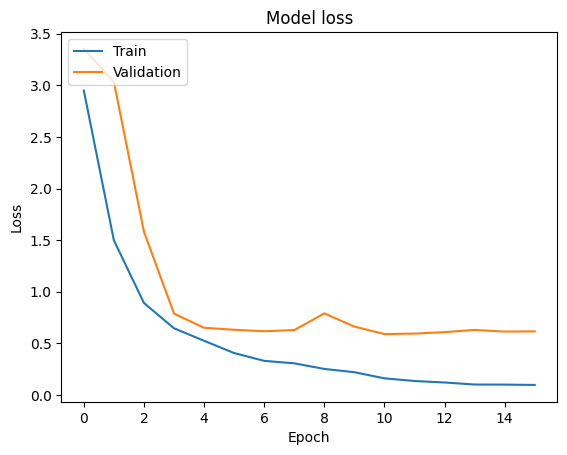

In [17]:

history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    shuffle=True)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [15]:
test_loss, test_accuracy = model.evaluate(val_generator)
print(f'Test accuracy: {test_accuracy}')

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7802 - loss: 0.8130
Test accuracy: 0.7860589623451233


In [ ]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
base_model = EfficientNetB7(include_top=False,
                            weights='imagenet',
                            input_shape=(224,224, 3))

base_model.trainable = True

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=6e-5)
loss_fn = SparseCategoricalCrossentropy()
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


history = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    shuffle=True)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


test_loss, test_accuracy = model.evaluate(val_generator)
print(f'Test accuracy: {test_accuracy}')

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


234/234 ━━━━━━━━━━━━━━━━━━━━ 534s 1s/step - accuracy: 0.2033 - loss: 3.3509 - val_accuracy: 0.0735 - val_loss: 10.7519 - learning_rate: 6.0000e-05
Epoch 2/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 132s 555ms/step - accuracy: 0.5921 - loss: 1.4477 - val_accuracy: 0.1008 - val_loss: 6.3401 - learning_rate: 6.0000e-05
Epoch 3/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 132s 552ms/step - accuracy: 0.7132 - loss: 0.9729 - val_accuracy: 0.5340 - val_loss: 1.8016 - learning_rate: 6.0000e-05
Epoch 4/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 132s 554ms/step - accuracy: 0.7800 - loss: 0.7549 - val_accuracy: 0.7517 - val_loss: 0.9344 - learning_rate: 6.0000e-05
Epoch 5/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 136s 569ms/step - accuracy: 0.8211 - loss: 0.5871 - val_accuracy: 0.7914 - val_loss: 0.7578 - learning_rate: 6.0000e-05
Epoch 6/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 136s 573ms/step - accuracy: 0.8503 - loss: 0.4761 - val_accuracy: 0.8150 - val_loss: 0.6897 - learning_rate: 6.0000e-05
Epoch 7/40
234/234 ━━━━━━━━━━━━━━━━━━━━ 121s 507ms/st

In [ ]:
prediction = model.predict(x_test, batch_size=32,verbose=1)

labelss = []
for i in range(len(prediction)):
    labelss.append(np.argmax(prediction[i]))

true_labels = []
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

model_accuracy = accuracy_score(y_true=true_labels, y_pred=labelss)
print("accuracy is {:.2f}".format(model_accuracy*100.0))

94/94 ━━━━━━━━━━━━━━━━━━━━ 37s 226ms/step
accuracy is 76.30


models from hugging face

In [ ]:
pip install transformers


In [ ]:
from transformers import TFAutoModelForImageClassification

base_model = TFAutoModelForImageClassification.from_pretrained("nateraw/food", num_labels=101,from_pt=True)


All PyTorch model weights were used when initializing TFViTForImageClassification.

All the weights of TFViTForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.


In [ ]:
class CustomFoodModel(tf.keras.Model):
    def __init__(self, num_classes=59, model_name="nateraw/food"):
        super(CustomFoodModel, self).__init__()
        self.transformer = TFAutoModelForImageClassification.from_pretrained(model_name, num_labels=num_classes, from_pt=True ,id2label={i: f'label_{i}' for i in range(num_classes)})
        self.pooling = tf.keras.layers.GlobalAveragePooling2D()  # Ensure that you pool the transformer outputs
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.transformer(inputs)[0]
        x = self.pooling(x)  # Pooling to reduce dimensionality
        x = self.dropout(x)
        return self.dense(x)



In [ ]:
model = CustomFoodModel(num_classes=59, model_name="nateraw/food")

ValueError: cannot reshape array of size 77568 into shape (768,59)

In [ ]:
model = models.Sequential([
    model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(59, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <transformers.models.vit.modeling_tf_vit.TFViTForImageClassification object at 0x7c8fcfe0ce50> (of type <class 'transformers.models.vit.modeling_tf_vit.TFViTForImageClassification'>)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(learning_rate=5e-5),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)


AlexNet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Initialize the model
model = Sequential()

# Layer 1: Conv2D with 64 filters of size 11x11, stride 4, padding 'valid', ReLU activation
model.add(Conv2D(64, kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu', input_shape=(224,224,3)))

# Layer 2: MaxPooling2D with pool size 3x3, stride 2
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Layer 3: Conv2D with 192 filters of size 5x5, padding 'same', ReLU activation
model.add(Conv2D(192, kernel_size=(5,5), padding='same', activation='relu'))

# Layer 4: MaxPooling2D with pool size 3x3, stride 2
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Layer 5: Conv2D with 384 filters of size 3x3, padding 'same', ReLU activation
model.add(Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'))

# Layer 6: Conv2D with 256 filters of size 3x3, padding 'same', ReLU activation
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))

# Layer 7: Conv2D with 256 filters of size 3x3, padding 'same', ReLU activation
model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))

# Layer 8: MaxPooling2D with pool size 3x3, stride 2
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Flatten the output
model.add(Flatten())

# Layer 9: Fully connected layer with 4096 neurons, ReLU activation
model.add(Dense(4096, activation='relu'))

# Layer 10: Dropout for regularization (optional but often used in AlexNet)
model.add(Dropout(0.4))

# Layer 11: Fully connected layer with 4096 neurons, ReLU activation
model.add(Dense(4096, activation='relu'))

# Layer 12: Dropout (optional)
model.add(Dropout(0.2))

# Output Layer: Fully connected layer with number of classes and softmax activation for classification
model.add(Dense(num_classes, activation='softmax'))


# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_98 (Conv2D)                   │ (None, 54, 54, 64)          │          23,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_99 (Conv2D)                   │ (None, 26, 26, 192)         │         307,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_100 (Conv2D)                  │ (None, 12, 12, 384)         │         663,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_101 (Conv2D)                  │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 62)                  │         254,014 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,723,518 (174.42 MB)

 Trainable params: 45,723,518 (174.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
300/300 ━━━━━━━━━━━━━━━━━━━━ 214s 670ms/step - accuracy: 0.0259 - loss: 4.1716 - val_accuracy: 0.0292 - val_loss: 3.9981 - learning_rate: 0.0010
Epoch 2/40
300/300 ━━━━━━━━━━━━━━━━━━━━ 194s 631ms/step - accuracy: 0.0275 - loss: 3.9963 - val_accuracy: 0.0242 - val_loss: 3.9958 - learning_rate: 0.0010
Epoch 3/40
300/300 ━━━━━━━━━━━━━━━━━━━━ 189s 616ms/step - accuracy: 0.0300 - loss: 3.9983 - val_accuracy: 0.0244 - val_loss: 3.9963 - learning_rate: 0.0010
Epoch 4/40
300/300 ━━━━━━━━━━━━━━━━━━━━ 195s 634ms/step - accuracy: 0.0275 - loss: 3.9997 - val_accuracy: 0.0253 - val_loss: 3.9951 - learning_rate: 0.0010
Epoch 5/40
300/300 ━━━━━━━━━━━━━━━━━━━━ 190s 617ms/step - accuracy: 0.0277 - loss: 3.9951 - val_accuracy: 0.0253 - val_loss: 3.9968 - learning_rate: 0.0010
Epoch 6/40
300/300 ━━━━━━━━━━━━━━━━━━━━ 194s 633ms/step - accuracy: 0.0329 - loss: 3.9995 - val_accuracy: 0.0244 - val_loss: 3.9945 - learning_rate: 0.0010
Epoch 7/40
300/300 ━━━━━━━━━━━━━━━━━━━━ 196s 638ms/step - accura

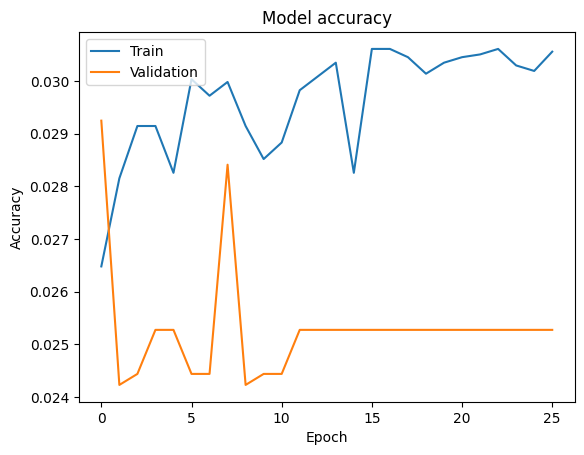

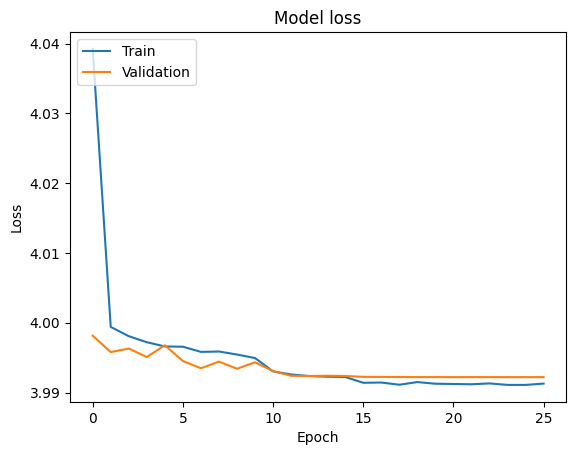

In [ ]:
history = model.fit(
    train_generator,
    epochs=40,  # Increase epochs as needed
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    shuffle=True
)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(x_test, batch_size=32,verbose=1)

labelss = []
for i in range(len(prediction)):
    labelss.append(np.argmax(prediction[i]))

true_labels = []
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

model_accuracy = accuracy_score(y_true=true_labels, y_pred=labelss)
print("accuracy is {:.2f}".format(model_accuracy*100.0))

187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
accuracy is 2.72


Label smoothening and squeez extraction block

In [ ]:
def se_block(input_tensor, ratio=16):
    """Squeeze-and-Excitation block."""
    filters = input_tensor.shape[-1]  # Number of filters (channels)
    se_shape = (1, 1, filters)

    # Squeeze
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape(se_shape)(se)

    # Excitation
    se = layers.Dense(filters // ratio, activation='relu', use_bias=False)(se)
    se = layers.Dense(filters, activation='sigmoid', use_bias=False)(se)

    # Scale
    se = layers.multiply([input_tensor, se])
    return se

vision transformers

In [ ]:
# Assuming the input images are already resized to 224x224 and normalized as needed
input_shape = (224, 224, 3)  # Input shape expected by the ViT model


# Convert NumPy arrays to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Batch size
batch_size = 128

# Shuffle, batch, and prefetch the datasets
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
#val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


In [ ]:
x_train = None
y_train = None
x_test = None
y_test = None
x_val = None
y_val = None

In [ ]:
# Check the shapes of the batches in the training dataset
for X_batch, y_batch in train_dataset.take(1):  # Take a single batch
    print("Train dataset - X_batch shape:", X_batch.shape)
    print("Train dataset - y_batch shape:", y_batch.shape)

# Check the shapes of the batches in the validation dataset
#for X_batch, y_batch in val_dataset.take(1):  # Take a single batch
#    print("Validation dataset - X_batch shape:", X_batch.shape)
#    print("Validation dataset - y_batch shape:", y_batch.shape)

# Check the shapes of the batches in the test dataset
for X_batch, y_batch in test_dataset.take(1):  # Take a single batch
    print("Test dataset - X_batch shape:", X_batch.shape)
    print("Test dataset - y_batch shape:", y_batch.shape)

In [ ]:
# Load the pre-trained ViT model
# Using the ViT model with 16x16 patches, pre-trained on ImageNet-21k and fine-tuned on ImageNet-1k
vit_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
vit_layer = hub.KerasLayer(vit_url, trainable=True)

In [ ]:
num_classes = 62

In [ ]:
input_shape = (224, 224, 3)  # Assuming the input images are 224x224 RGB

# Define the model
def build_finetune_vit_model(x, num_classes):
    inputs = layers.Input(shape = x )

    # Preprocess input if needed by the hub model (resize, normalize, etc.)
    # For simplicity, assuming the input is already preprocessed to match ViT expectations

    vit_features = vit_layer(inputs)

    # Add new layers for classification
    x = layers.Dense(1024, activation='relu')(vit_features)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model



# Build and compile the model
finetune_vit_model = build_finetune_vit_model(input_shape,num_classes)

finetune_vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Print model summary
finetune_vit_model.summary()

ValueError: Exception encountered when calling layer 'keras_layer_1' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_1' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_1>
  • training=None

In [ ]:
# Test the model with dummy data
dummy_data = tf.random.normal([1, 224, 224, 3])  # A single image
vit_output = vit_layer(dummy_data)
print(vit_output.shape)  # Should match the expected output shape of the ViT layer

NotFoundError: Exception encountered when calling layer 'keras_layer' (type KerasLayer).

could not find registered transfer manager for platform Host -- check target linkage [Op:__inference_restored_function_body_30875]

Call arguments received by layer 'keras_layer' (type KerasLayer):
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=None

In [ ]:
def build_finetune_vit_model(x, num_classes):
    # Input layer
    inputs = layers.Input(shape=x)

    # Ensure inputs are in tensor format (convert if necessary)
    inputs_cast = tf.cast(inputs, tf.float32)  # Explicitly cast inputs to TensorFlow tensor

    # Pass through Vision Transformer layer
    vit_features = vit_layer(inputs_cast)

    # Add a classification head
    x = layers.Dense(512, activation='relu')(vit_features)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
for x_batch, y_batch in train_dataset.take(1):
    print(f"X_batch dtype: {x_batch.dtype}")  # Check if float32
    print(f"y_batch dtype: {y_batch.dtype}")  # Check if float32

# If y_batch is not float32, you may need to cast it
train_dataset = train_dataset.map(lambda x, y: (x, tf.cast(y, tf.float32)))
val_dataset = val_dataset.map(lambda x, y: (x, tf.cast(y, tf.float32)))
test_dataset = test_dataset.map(lambda x, y: (x, tf.cast(y, tf.float32)))

# Build and compile the model
input_shape = (224, 224, 3)
num_classes = 73  # Update with the correct number of classes
finetune_vit_model = build_finetune_vit_model(input_shape=input_shape, num_classes=num_classes)

finetune_vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Print model summary
finetune_vit_model.summary()

# Train the model
history = finetune_vit_model.fit(train_dataset, validation_data=val_dataset, epochs=5)

X_batch dtype: <dtype: 'float32'>
y_batch dtype: <dtype: 'float32'>


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


TypeError: build_finetune_vit_model() got an unexpected keyword argument 'input_shape'

In [ ]:
num_classes = 62

# Updated model function
def build_finetune_vit_model(x, num_classes):
    # Define the input layer with the correct shape and dtype
    inputs = layers.Input(shape=x, dtype=tf.float32)

    # Load the Vision Transformer model from TensorFlow Hub
    vit_layer = hub.KerasLayer(vit_url, trainable=True)

    # Use Lambda to pass the input through the Vision Transformer
    vit_features = layers.Lambda(lambda x: vit_layer(x))(inputs)

    # Add additional layers for classification
    x = layers.Dense(512, activation='relu')(vit_features)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

# Build and compile the model
finetune_vit_model = build_finetune_vit_model(input_shape, num_classes)

finetune_vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Print model summary
finetune_vit_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 62)                  │          15,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 540,990 (2.06 MB)

 Trainable params: 540,990 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_classes = 62
# Updated model function to correctly pass input tensors
def build_finetune_vit_model(x, num_classes):
    # Define the input layer with the correct shape and dtype
    inputs = layers.Input(shape=x , dtype=tf.float32)

    vit_layer = hub.KerasLayer(vit_url, trainable=True)

    # Pass through the pre-trained Vision Transformer layer from TensorFlow Hub
    vit_features = layers.Lambda(lambda x: vit_layer(x))(inputs)

    # Add additional layers for classification
    x = layers.Dense(512, activation='relu')(vit_features)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224,224,3)
# Build and compile the model

finetune_vit_model = build_finetune_vit_model(input_shape, num_classes)


finetune_vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Print model summary
finetune_vit_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 62)                  │          15,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 540,990 (2.06 MB)

 Trainable params: 540,990 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


# Fine-tune the model using the TensorFlow datasets
history = finetune_vit_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=40,  # Fine-tune for a few more epochs
    callbacks=[early_stopping, reduce_lr, model_checkpoint]
)
# Evaluate on test data
test_loss, test_acc = finetune_vit_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

Epoch 1/40
599/599 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.2414 - loss: 3.3268 - val_accuracy: 0.6204 - val_loss: 1.5103 - learning_rate: 1.0000e-04
Epoch 2/40
599/599 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.6202 - loss: 1.4655 - val_accuracy: 0.6810 - val_loss: 1.2352 - learning_rate: 1.0000e-04
Epoch 3/40
599/599 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7049 - loss: 1.1097 - val_accuracy: 0.7013 - val_loss: 1.1240 - learning_rate: 1.0000e-04
Epoch 4/40
599/599 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7481 - loss: 0.9191 - val_accuracy: 0.7188 - val_loss: 1.0670 - learning_rate: 1.0000e-04
Epoch 5/40
599/599 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7839 - loss: 0.7776 - val_accuracy: 0.7263 - val_loss: 1.0375 - learning_rate: 1.0000e-04
Epoch 6/40
599/599 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8139 - loss: 0.6815 - val_accuracy: 0.7305 - val_loss: 1.0136 - learning_rate: 1.0000e-04
Epoch 7/40
599/599 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/ste

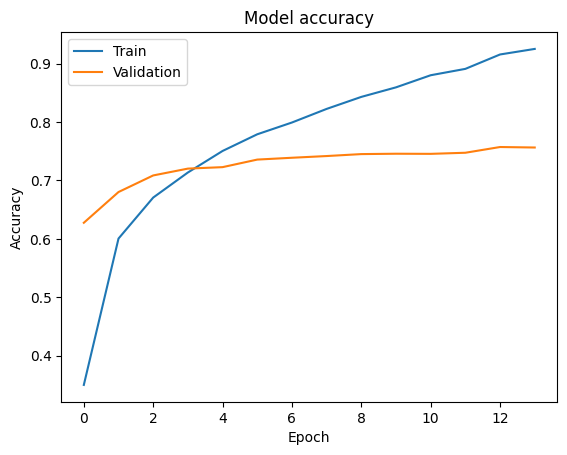

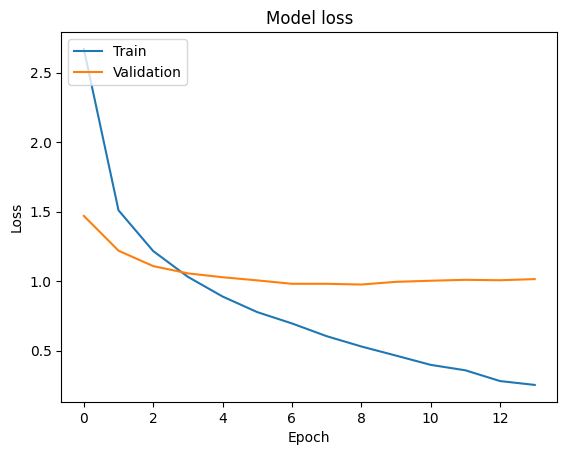

In [ ]:
# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

hybird model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB5, ResNet101
import tensorflow_hub as hub

# Pre-trained ViT Model URL
vit_url = "https://tfhub.dev/sayakpaul/vit_b16_fe/1"
# EfficientNetB5
efficientnet_base = EfficientNetB5(include_top=False, input_shape=input_shape, weights="imagenet")
efficientnet_base.trainable = False  # Freezing EfficientNetB5 layers

    # ResNet101
resnet_base = ResNet101(include_top=False, input_shape=input_shape, weights="imagenet")
resnet_base.trainable = False  # Freezing ResNet101 layers

# Build the Hybrid Model
def build_heavy_hybrid_model(input_shape, num_classes):


    # ViT (Vision Transformer)
    vit_layer = hub.KerasLayer(vit_url, trainable=False, input_shape=input_shape)

    # Input Layer
    inputs = layers.Input(shape=input_shape)

    # Extract Features from EfficientNet and ResNet
    efficientnet_features = efficientnet_base(inputs)
    efficientnet_features = layers.GlobalAveragePooling2D()(efficientnet_features)

    resnet_features = resnet_base(inputs)
    resnet_features = layers.GlobalAveragePooling2D()(resnet_features)

    # Concatenate EfficientNet and ResNet features
    combined_features = layers.Concatenate()([efficientnet_features, resnet_features])

    # Feed concatenated features into Vision Transformer
    vit_features = layers.Lambda(lambda x: vit_layer(x))(inputs)


    # Combine ViT features with EfficientNet + ResNet features
    combined_features = layers.Concatenate()([combined_features, vit_features])

    # Fully Connected Layers (deeper head for richer representations)
    x = layers.Dense(1024, activation='relu')(combined_features)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    # Output Layer (Softmax for classification)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create and return the model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Compile the Heavy Hybrid Model
input_shape = (224, 224, 3)
num_classes = 62
heavy_hybrid_model = build_heavy_hybrid_model(input_shape=input_shape, num_classes=num_classes)
heavy_hybrid_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Summary of the model
heavy_hybrid_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb5            │ (None, 7, 7, 2048)     │     28,513,527 │ input_layer_13[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet101 (Functional)    │ (None, 7, 7, 2048)     │     42,658,176 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ efficientnetb5[0][0]   │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet101[0][0]        │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 4096)           │              0 │ global_average_poolin… │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_4 (Lambda)         │ (None, 768)            │              0 │ input_layer_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 4864)           │              0 │ concatenate_4[0][0],   │
│ (Concatenate)             │                        │                │ lambda_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1024)           │      4,981,760 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 1024)           │              0 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 512)            │        524,800 │ dropout_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 512)            │              0 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 256)            │        131,328 │ dropout_11[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 256)            │              0 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 62)             │         15,934 │ dropout_12[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 76,825,525 (293.07 MB)

 Trainable params: 5,653,822 (21.57 MB)

 Non-trainable params: 71,171,703 (271.50 MB)

In [ ]:
# Function to gradually unfreeze layers of EfficientNet, ResNet, and ViT
def gradual_unfreeze(model, base_model, layers_to_unfreeze):
    base_model.trainable = True
    # Unfreeze only the top layers (last 'layers_to_unfreeze' layers)
    for layer in base_model.layers[:-layers_to_unfreeze]:
        layer.trainable = False
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Step 1: Train with frozen layers
initial_epochs = 10
history = heavy_hybrid_model.fit(train_dataset, validation_data=val_dataset, epochs=initial_epochs, callbacks=[early_stopping, reduce_lr, model_checkpoint])

# Step 2: Unfreeze the top layers for fine-tuning
layers_to_unfreeze = 50  # Modify this number based on your needs

# Unfreeze top layers of EfficientNet, ResNet, and ViT
heavy_hybrid_model = gradual_unfreeze(heavy_hybrid_model, efficientnet_base, layers_to_unfreeze)
heavy_hybrid_model = gradual_unfreeze(heavy_hybrid_model, resnet_base, layers_to_unfreeze)
vit_layer.trainable = True  # Fully unfreeze ViT

# Step 3: Compile the model again with a lower learning rate for fine-tuning
heavy_hybrid_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Step 4: Continue training with unfrozen layers
fine_tuning_epochs = 20
history_finetune = heavy_hybrid_model.fit(train_dataset, validation_data=val_dataset,
                                          epochs=fine_tuning_epochs, initial_epoch=initial_epochs,
                                          callbacks=[early_stopping, reduce_lr, model_checkpoint])


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 112s 374ms/step - accuracy: 0.5630 - loss: 1.6805 - val_accuracy: 0.6818 - val_loss: 1.2474 - learning_rate: 1.0000e-04
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 175ms/step - accuracy: 0.6496 - loss: 1.3185 - val_accuracy: 0.7029 - val_loss: 1.1186 - learning_rate: 1.0000e-04
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 175ms/step - accuracy: 0.6927 - loss: 1.1383 - val_accuracy: 0.7197 - val_loss: 1.0528 - learning_rate: 1.0000e-04
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 175ms/step - accuracy: 0.7250 - loss: 1.0120 - val_accuracy: 0.7236 - val_loss: 1.0293 - learning_rate: 1.0000e-04
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 174ms/step - accuracy: 0.7464 - loss: 0.9243 - val_accuracy: 0.7334 - val_loss: 0.9826 - learning_rate: 1.0000e-04
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 174ms/step - accuracy: 0.7756 - loss: 0.8059 - val_accuracy: 0.7405 - val_loss: 0.9696 - learning_rate: 1.0000e-04
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 52s 1

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
prediction = heavy_hybrid_model.predict(x_test, batch_size=32,verbose=1)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
print(prediction)

[[9.4715822e-01 1.3927760e-05 2.7649123e-05 ... 6.5418391e-04
  2.9660955e-06 6.0807652e-04]
 [1.8563161e-06 5.0557833e-08 1.4333984e-06 ... 9.7499251e-06
  5.3996924e-08 4.7989391e-07]
 [2.1619993e-08 9.5261342e-08 9.9992120e-01 ... 3.4828588e-08
  2.8357595e-08 2.4066233e-06]
 ...
 [1.0004503e-06 1.0646813e-06 5.2176855e-08 ... 5.2086175e-06
  1.3622346e-07 3.6474644e-06]
 [5.4045629e-02 1.0465514e-03 1.1062428e-04 ... 9.4279763e-05
  1.8323617e-05 6.5285538e-04]
 [4.7049911e-05 5.0553783e-05 1.7421822e-01 ... 1.4656345e-06
  6.6695075e-06 1.6674550e-06]]


In [ ]:
labelss = []
for i in range(len(prediction)):
    labelss.append(np.argmax(prediction[i]))

In [ ]:
print(labelss)

[30, 20, 15, 9, 9, 6, 19, 29, 28, 18, 21, 3, 33, 1, 20, 3, 3, 12, 22, 5, 33, 13, 20, 5, 31, 21, 18, 9, 21, 9, 11, 4, 1, 11, 21, 19, 13, 18, 7, 0, 13, 15, 16, 12, 25, 4, 30, 14, 25, 10, 27, 28, 31, 28, 13, 10, 18, 20, 9, 21, 1, 17, 10, 20, 7, 27, 13, 5, 5, 12, 31, 25, 27, 29, 14, 4, 30, 18, 12, 21, 28, 20, 15, 19, 2, 11, 27, 12, 11, 10, 9, 5, 33, 21, 14, 3, 11, 32, 12, 7, 22, 4, 13, 32, 10, 2, 7, 7, 29, 30, 31, 31, 16, 19, 25, 8, 4, 3, 11, 3, 12, 10, 16, 15, 2, 14, 32, 20, 2, 28, 2, 25, 12, 19, 8, 0, 29, 5, 3, 11, 5, 19, 11, 1, 9, 13, 9, 29, 6, 19, 11, 18, 9, 8, 4, 19, 25, 9, 18, 11, 22, 2, 31, 0, 29, 18, 3, 27, 19, 19, 7, 4, 11, 4, 0, 25, 27, 4, 32, 0, 2, 22, 21, 6, 9, 27, 4, 18, 19, 27, 6, 8, 27, 5, 11, 12, 13, 3, 15, 7, 22, 7, 4, 12, 10, 2, 22, 12, 9, 20, 15, 21, 12, 33, 2, 17, 2, 1, 2, 33, 18, 12, 32, 17, 2, 19, 14, 29, 13, 25, 16, 5, 8, 17, 27, 33, 33, 33, 1, 9, 21, 30, 25, 4, 25, 7, 12, 0, 13, 0, 19, 31, 18, 20, 17, 12, 3, 25, 28, 2, 7, 18, 22, 17, 15, 28, 20, 12, 2, 9, 19, 10, 17

In [ ]:
true_labels = []
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))
    print(true_labels)

[0]
[0, 24]
[0, 24, 2]
[0, 24, 2, 12]
[0, 24, 2, 12, 3]
[0, 24, 2, 12, 3, 12]
[0, 24, 2, 12, 3, 12, 30]
[0, 24, 2, 12, 3, 12, 30, 10]
[0, 24, 2, 12, 3, 12, 30, 10, 16]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6, 31]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6, 31, 21]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6, 31, 21, 16]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6, 31, 21, 16, 12]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6, 31, 21, 16, 12, 8]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6, 31, 21, 16, 12, 8, 3]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10, 6, 31, 21, 16, 12, 8, 3, 4]
[0, 24, 2, 12, 3, 12, 30, 10, 16, 22, 18, 3, 28, 10

In [ ]:
model_accuracy = accuracy_score(y_true=true_labels, y_pred=labelss)
print("accuracy is {:.2f}".format(model_accuracy*100.0))

accuracy is 93.54


In [ ]:
hybrid_model.save("hybrid_model2_93.keras")

code given by sir to be executed

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',  # Sparse labels for SparseCategoricalCrossentropy
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Load MobileNetV2 model without top layers
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(img_shape, img_shape, 3)
)

# Freeze base model layers
base_model.trainable = False

# Build classification model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(101, activation='softmax')  # Number of classes is 101, softmax activation
])

# Compile the model
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
loss_fn = SparseCategoricalCrossentropy()
metrics = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

# Train the model
epochs = 30
history = model.fit(train_generator,
          epochs=epochs,
          validation_data=test_generator)

# Evaluate model accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')



#to train more modules on the same model
epochs = 20
history = model.fit(train_generator,
          epochs=epochs,
          validation_data=test_generator)

# Evaluate model accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')